<a href="https://colab.research.google.com/github/Tessellate-Imaging/Monk_Object_Detection/blob/master/application_model_zoo/Example%20-%20Human%20Parsing%20Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Table of contents


## 1. Installation Instructions



## 2. Use trained model to segment people in imagery



## 3. How to train a custom segmenter using "Human Parsing Dataset"

# About the networks


1. UNet
  - https://arxiv.org/abs/1505.04597
  - https://towardsdatascience.com/understanding-semantic-segmentation-with-unet-6be4f42d4b47
  - https://towardsdatascience.com/unet-line-by-line-explanation-9b191c76baf5


2. FPN
  - http://openaccess.thecvf.com/content_cvpr_2017/papers/Lin_Feature_Pyramid_Networks_CVPR_2017_paper.pdf
  - https://towardsdatascience.com/review-fpn-feature-pyramid-network-object-detection-262fc7482610
  - https://medium.com/@jonathan_hui/understanding-feature-pyramid-networks-for-object-detection-fpn-45b227b9106c


3. PSPNet
  - https://arxiv.org/abs/1612.01105
  - https://towardsdatascience.com/review-pspnet-winner-in-ilsvrc-2016-semantic-segmentation-scene-parsing-e089e5df177d
  - https://developers.arcgis.com/python/guide/how-pspnet-works/


4. Linknet
  - https://arxiv.org/pdf/1707.03718.pdf
  - https://neptune.ai/blog/image-segmentation-tips-and-tricks-from-kaggle-competitions

# Installation

 - Run these commands
     
     - git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git
     
     - cd Monk_Object_Detection/9_segmentation_models/installation
     
 - Select the right requirements file and run
 
     - cat requirements_cuda9.0.txt | xargs -n 1 -L 1 pip install

In [ ]:
! git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git

In [ ]:
# For colab use the command below
! cd Monk_Object_Detection/9_segmentation_models/installation && cat requirements_colab.txt | xargs -n 1 -L 1 pip install


# For Local systems and cloud select the right CUDA version
#! cd Monk_Object_Detection/9_segmentation_models/installation && cat requirements_cuda10.0.txt | xargs -n 1 -L 1 pip install

# Use already trained model for demo

In [1]:
import os
import sys
sys.path.append("Monk_Object_Detection/9_segmentation_models/lib/");

In [2]:
from infer_segmentation import Infer

Using TensorFlow backend.


Segmentation Models: using `keras` framework.


In [3]:
gtf = Infer();

In [4]:
classes_dict = {
    'background': 0, 
    'person': 1
};
classes_to_train = ['background', 'person'];

In [5]:
gtf.Data_Params(classes_dict, classes_to_train, image_shape=[256, 256])

In [ ]:
# Download trained model

In [ ]:
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1kjJH_NAIfZEeghdQ_EUygglPON_CDQ4B' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1kjJH_NAIfZEeghdQ_EUygglPON_CDQ4B" -O seg_person_trained.zip && rm -rf /tmp/cookies.txt

In [ ]:
! unzip -qq seg_person_trained.zip

In [6]:
gtf.Model_Params(model="Unet", backbone="efficientnetb3", path_to_model='seg_person_trained/best_model.h5')

In [7]:
gtf.Setup();












Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.






In [15]:
cp dataset/train/images/4000.png seg_person_trained/test/4.png

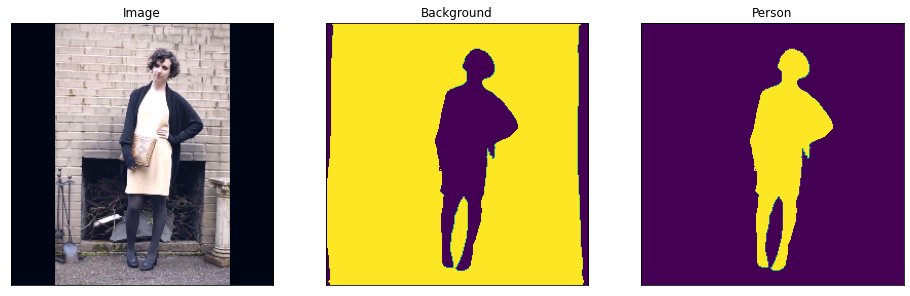

In [10]:
gtf.Predict("seg_person_trained/test/1.png", vis=True);

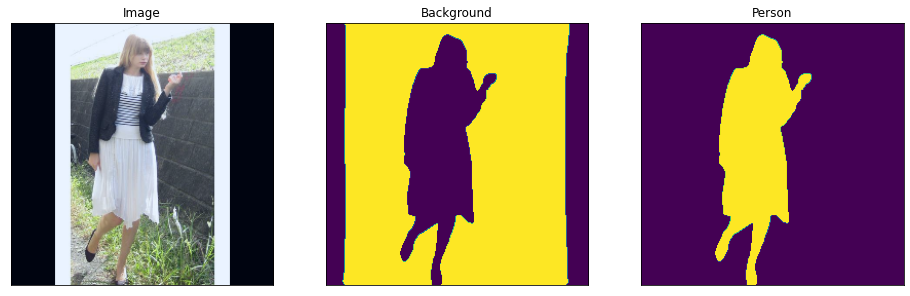

In [12]:
gtf.Predict("seg_person_trained/test/2.png", vis=True);

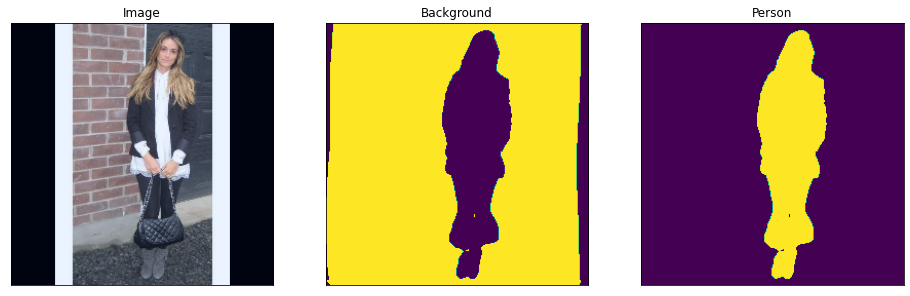

In [14]:
gtf.Predict("seg_person_trained/test/3.png", vis=True);

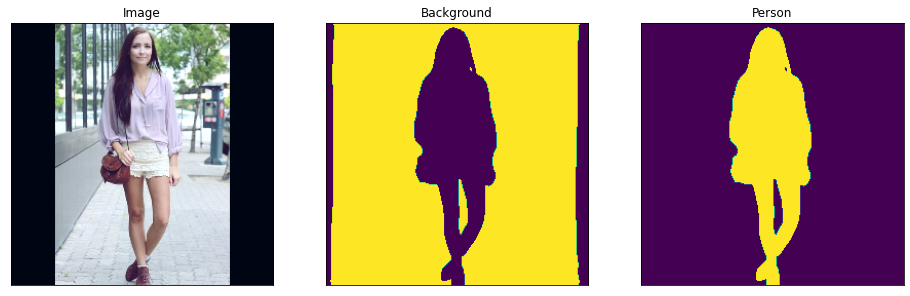

In [16]:
gtf.Predict("seg_person_trained/test/4.png", vis=True);

# Train you own detector

# Monk Format

## Dataset Directory Structure

      root_dir
          |
          | 
          |         
          |----train_img_dir
          |       |
          |       |---------img1.jpg
          |       |---------img2.jpg
          |                |---------..........(and so on) 
          |
          |----train_mask_dir
          |       |
          |       |---------img1.jpg
          |       |---------img2.jpg
          |                |---------..........(and so on)
          |
          |----val_img_dir (optional)
          |       |
          |       |---------img1.jpg
          |       |---------img2.jpg
          |                |---------..........(and so on)
          |
          |----val_mask_dir (optional)
          |       |
          |       |---------img1.jpg
          |       |---------img2.jpg
          |                |---------..........(and so on)

          
          

# Sample Dataset Credits

    credits: https://www.kaggle.com/kairess/human-segmentation

In [ ]:
! pip install kaggle

In [ ]:
! kaggle datasets download kairess/human-segmentation

In [ ]:
! unzip -qq human-segmentation.zip

In [ ]:
! mkdir dataset
! mkdir dataset/train
! mkdir dataset/val
! mkdir dataset/train/images
! mkdir dataset/train/masks
! mkdir dataset/val/images
! mkdir dataset/val/masks

In [ ]:
import os
import numpy as np
import cv2
from tqdm import tqdm

In [ ]:
xtrain = np.load('x_train.npz')['data'].astype(np.float32)
ytrain = np.load('y_train.npz')['data'].astype(np.float32)
xval = np.load('x_val.npz')['data'].astype(np.float32)
yval = np.load('y_val.npz')['data'].astype(np.float32) 

In [ ]:
for i in tqdm(range(len(xtrain))):
    img = xtrain[i];
    cv2.imwrite("dataset/train/images/" + str(i) + ".png", img);

    mask = ytrain[i][:, :, 1];
    cv2.imwrite("dataset/train/masks/" + str(i) + ".png", mask);

In [ ]:
for i in tqdm(range(len(xval))):
    img = xval[i];
    cv2.imwrite("dataset/val/images/" + str(i) + ".png", img);

    mask = yval[i][:, :, 1];
    cv2.imwrite("dataset/val/masks/" + str(i) + ".png", mask);

## Training 

In [ ]:
import os
import sys
sys.path.append("Monk_Object_Detection/9_segmentation_models/lib/");

In [ ]:
from train_segmentation import Segmenter

In [ ]:
gtf = Segmenter();

In [ ]:
train_img_dir = "dataset/train/images";
train_mask_dir = "dataset/train/masks";

val_img_dir = "dataset/val/images";
val_mask_dir = "dataset/val/masks";


In [ ]:
classes_dict = {
    'background': 0, 
    'person': 1
};
classes_to_train = ['background', 'person'];

In [ ]:
gtf.Train_Dataset(train_img_dir, train_mask_dir, classes_dict, classes_to_train)

In [ ]:
gtf.Val_Dataset(val_img_dir, val_mask_dir)

In [ ]:
gtf.List_Backbones();

In [ ]:
gtf.Data_Params(batch_size=2, backbone="efficientnetb3", image_shape=[256, 256])

In [ ]:
gtf.List_Models();

In [ ]:
gtf.Model_Params(model="Unet")

In [ ]:
gtf.Train_Params(lr=0.0001)

In [ ]:
gtf.Setup();

In [ ]:
gtf.Train(num_epochs=300);

In [ ]:
gtf.Visualize_Training_History();

# Inference (Post Training)

In [ ]:
import os
import sys
sys.path.append("Monk_Object_Detection/9_segmentation_models/lib/");

In [ ]:
from infer_segmentation import Infer

In [ ]:
gtf = Infer();

In [ ]:
classes_dict = {
    'background': 0, 
    'person': 1
};
classes_to_train = ['background', 'person'];

In [ ]:
gtf.Data_Params(classes_dict, classes_to_train, image_shape=[256, 256])

In [ ]:
gtf.Model_Params(model="Unet", backbone="efficientnetb3", path_to_model='best_model.h5')

In [ ]:
gtf.Setup();

In [ ]:
gtf.Predict("dataset/val/images/1.png", vis=True);